### Outliers:

outliers are values that are outside the range(min,max).
These values can effect our results. 

for example:

x = [5,6,7,8,6,5,4,7,4,100]

agr hum mean nikaly to 100 ki waja se hmara data ka mean change ho jata hy or standard deviation pr bhi effect krty hyn

or agr observe kry to hmari min value 4 and max 8 hy. or 100 hmari range se 

boht out hy. is lye phr hum is outlier ko remove krty hyn.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### How to detect Outliers

- Normal distribution

- Box plot



In [3]:
from IPython.display import Image

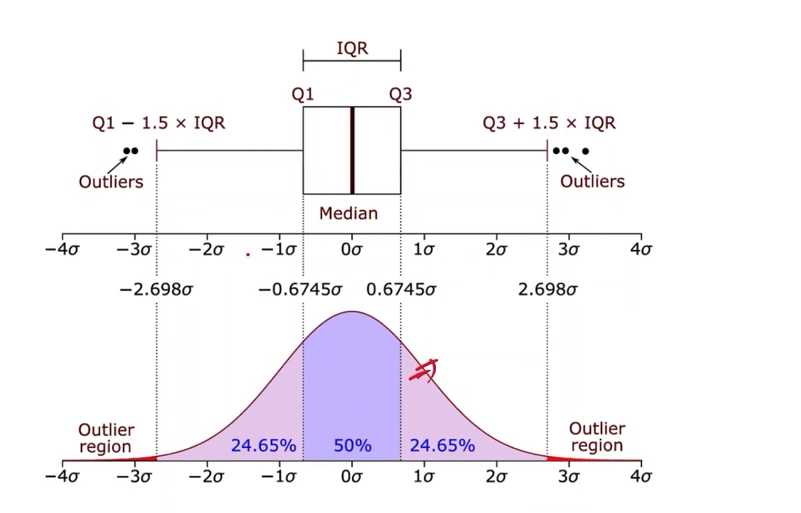

In [5]:
Image(filename="outliers.png")

Normally hmara data normal distribution pattern ko follow krta hy.
or agr uski tail boht ziyada lambi ho jae to it means is me outliers hyn.
is ka dekhny ka tarika jo hy box plot hota hy. hum box plot se dekhty hyn.

#### Box plot
box plot ya whisker plot bhi kehty hyn. is me whisker plot ki jo caps hyn us se pehly or us k bad wala data hmara outliers kehlata hy.
Or ye outliers hmary mathematical operation me boht ziyada mistake krty hyn.
for example mean, standard deviation calculate krni hy to us me boht ziyada
noise create krty hyn. or outcomes me bhi distortion create krty hyn.

### Standard deviatoin:
standard deviation is a statistical measure that quantifies the amount of variation or dispersion in a dataset. It tells how much the individual data points differ from the mean (average) value of the dataset.

In [2]:
dataset = pd.read_csv("loan.csv")
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset.describe()
# is me applicant income or coapplicant income me outliers ho skty hyn.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

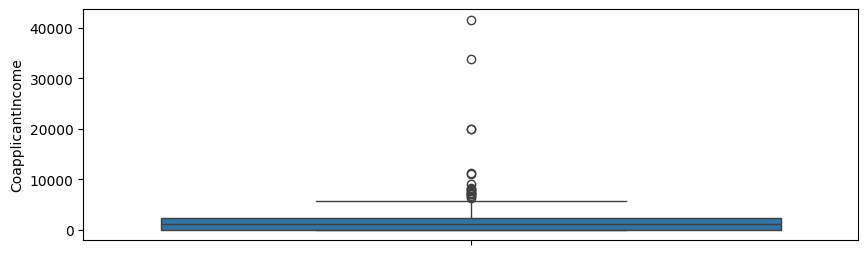

In [4]:
plt.figure(figsize=(10, 3))
#sns.boxplot(x='CoapplicantIncome', data=dataset) 
# is k through CoapplicantIncome ki values ko x axis pr dekhae ga.
# by default y axis pr dekhata hy. like neechy wali line
sns.boxplot(dataset['CoapplicantIncome']) 
plt.show()  

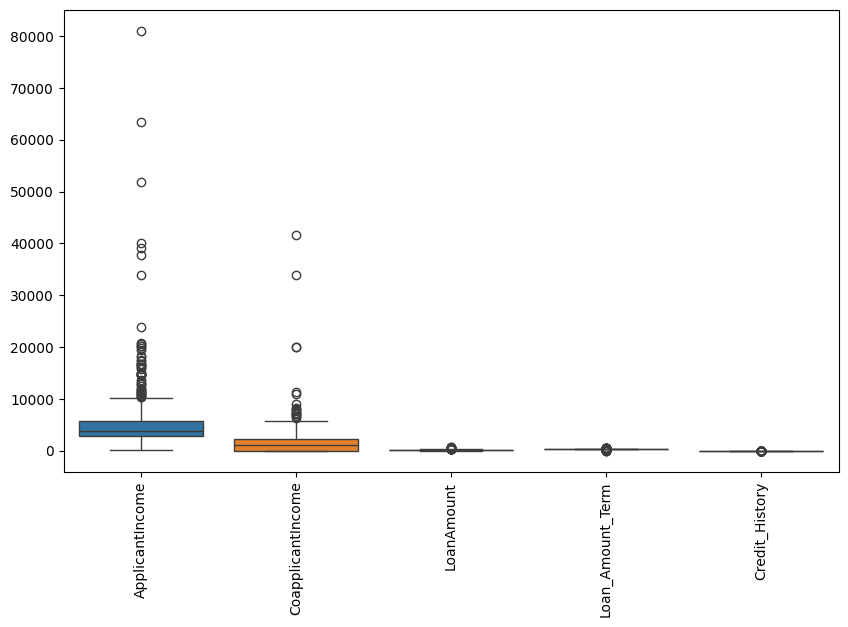

In [7]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Plot box plots for all columns in the dataset
sns.boxplot(data=dataset) # data=dataset[["ApplicantIncome","CoapplicantIncome"]]
#sns.boxplot(data=dataset, y="ApplicantIncome")
#sns.boxplot(data=dataset, y="CoapplicantIncome")

#melted_data = pd.melt(dataset, value_vars=["ApplicantIncome", "CoapplicantIncome"], 
#                      var_name="Income Type", value_name="Income")

# Create the boxplot with a gap between both variables
#sns.boxplot(x="Income", y="Income Type", data=melted_data)

# Display the plot
plt.xticks(rotation=90)  # Rotate column names for better readability

plt.show()

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_46284\964977839.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["CoapplicantIncome"])


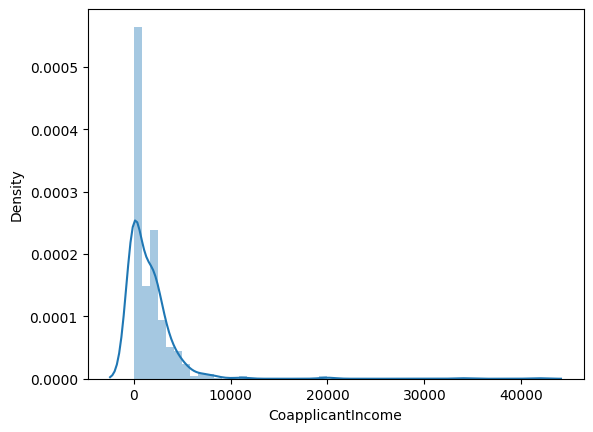

In [21]:
# iqr1 = 2877.5
# iqr3 = 3812.5

sns.distplot(dataset["CoapplicantIncome"])
plt.show()

### outliers effect on statistical problems like mean, mode, median,
### or then we train machine learning model which also effect due to outliers and
### start wrong predictions 

In [22]:
dataset.shape

(614, 13)

## How to remove outliers

### 1. using IQR method

In [8]:
q1 = dataset["CoapplicantIncome"].quantile(0.25)
q3 = dataset["CoapplicantIncome"].quantile(0.75)
iqr = q3-q1
q1,q3,iqr

(np.float64(0.0), np.float64(2297.25), np.float64(2297.25))

In [9]:
min = q1-1.5*iqr
max = q3 + 1.5 * iqr
min,max

(np.float64(-3445.875), np.float64(5743.125))

In [10]:
new_dataset = dataset[ dataset["CoapplicantIncome"] <= max]

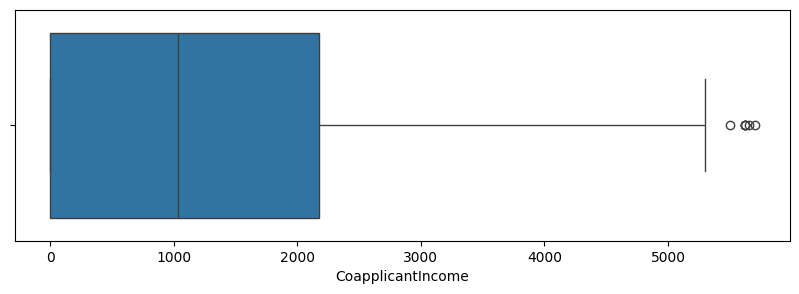

In [38]:
# boxplot after removal outliers
plt.figure(figsize=(10,3))
sns.boxplot(x='CoapplicantIncome', data=new_dataset)
plt.show()


#### ab yahan pr kuch outliers bach gae hyn. zrori nahi k sary outliers ko remove kia jae.
#### kuch outliers reh bhi skty hyn bcz outliers remove krne se hamara data loss ho ga.
#### or may be hmary kaam k features bhi remove ho jae.
#### wese bhi ye ap k machine learning algorithms pr depend krta hy.
#### agr alogrithm outliers se effect nahi hota to its ok outliers remove na kry.
#### jese decision tree ye outliers se effect nahi hota.
#### lakin agr bat ki jae linear regression ki to ye outliers pr effect hota hy.

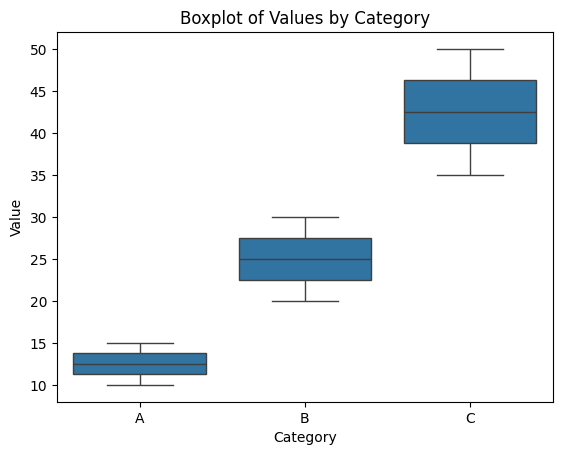

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Sample data
data = {'Category': ['A', 'A', 'B', 'B', 'B', 'C', 'C', 'C', 'C'],
        'Value': [10, 15, 20, 25, 30, 35, 40, 45, 50]}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Create a boxplot using Seaborn
sns.boxplot(x='Category', y='Value', data=df)

# Add labels and title
plt.xlabel('Category')
plt.ylabel('Value')
plt.title('Boxplot of Values by Category')

# Show the plot
plt.show()


### 2. Removal of outliers using z-score

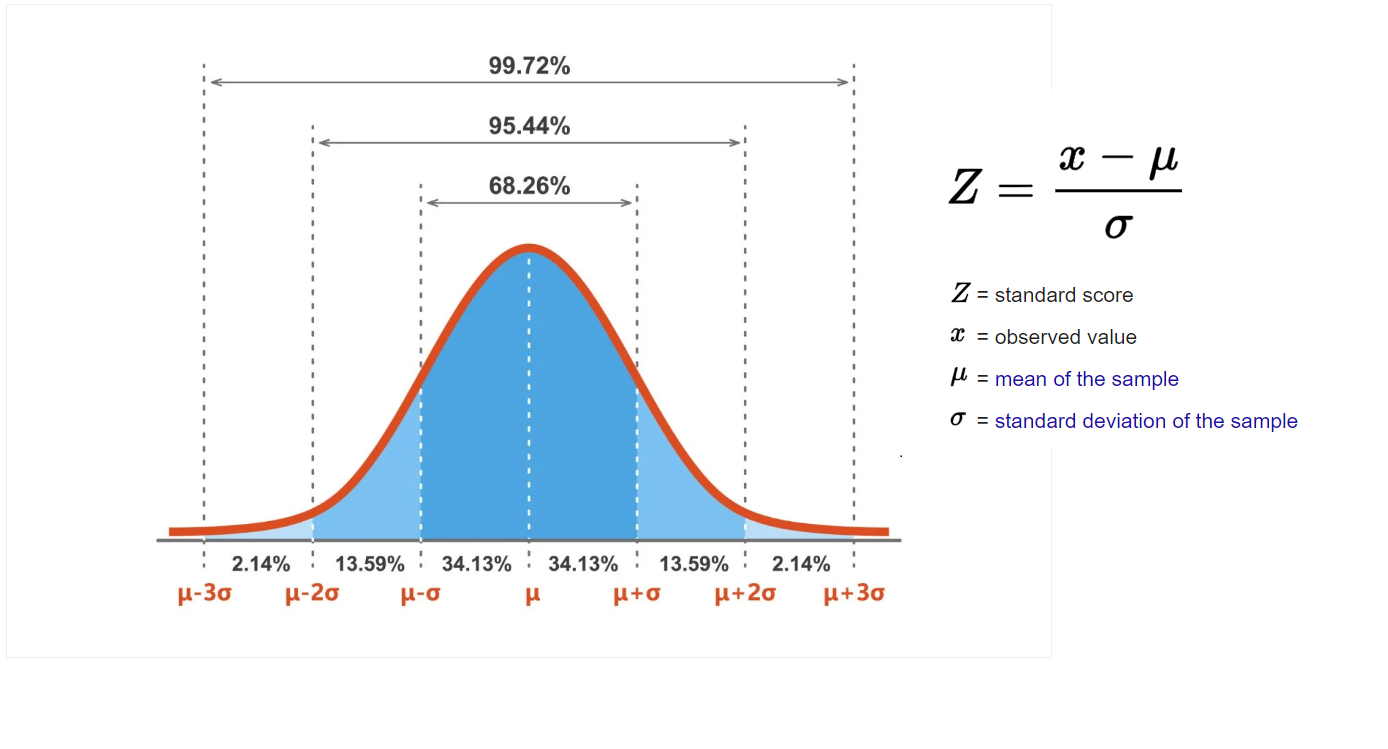

In [40]:
from IPython.display import Image

Image(filename="normaldistribution.png")
# website link https://www.simplypsychology.org/normal-distribution.html

Hmara data jo hy kuch standard deviation me is trhan divide hota hy.
is me center me humy meu milta hy. 
###### agr u-sd------u+sd dekhy to humy 68.26% data milta hy.
###### isi trhan u-2sd--------u+2sd dekhy to humy 95.44% data milta hy
###### isi trhan u-3sd--------u+3sd dekhy to humy 959.72% data milta hy

In [42]:
dataset = pd.read_csv("loan.csv")
dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [44]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [45]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='CoapplicantIncome'>

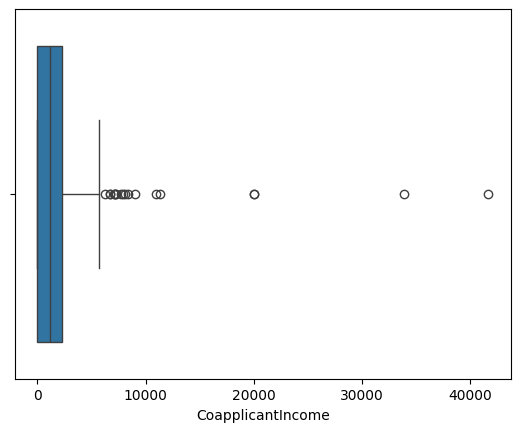

In [46]:
sns.boxplot(x='CoapplicantIncome' , data=dataset)
plt.show()

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_46284\2234827149.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset['CoapplicantIncome'])


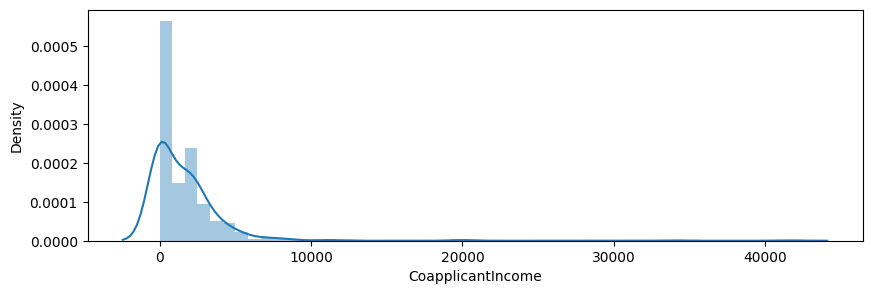

In [64]:
plt.figure(figsize=(10,3))
sns.distplot(dataset['CoapplicantIncome'])
plt.show()

### Removal of outliers using Direct method

In [49]:
## range bana lety hyn q k hum pta hy k hmara dataset mean-3sd to mean+3sd k
# between rely krta. 

min_range = dataset['CoapplicantIncome'].mean() - 3*dataset['CoapplicantIncome'].std()
max_range = dataset['CoapplicantIncome'].mean() + 3*dataset['CoapplicantIncome'].std()
min_range,max_range

(-7157.4993096454655, 10399.990905699668)

In [53]:
new_dataset = dataset[dataset["CoapplicantIncome"]<= max_range]

In [78]:
new_dataset.shape

(608, 13)

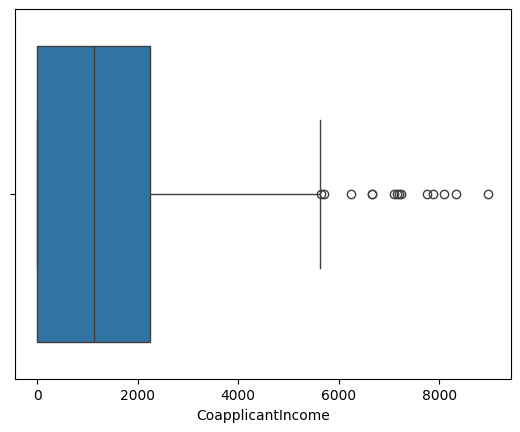

In [54]:
sns.boxplot(x='CoapplicantIncome' , data=new_dataset)
plt.show()

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_46284\1739302083.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset['CoapplicantIncome'])


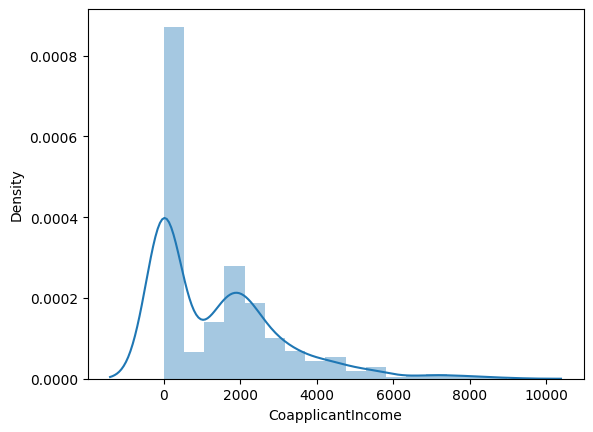

In [56]:
sns.distplot(new_dataset['CoapplicantIncome'])
plt.show()

In [57]:
new_dataset2 = dataset[dataset["CoapplicantIncome"]<= 6000]

In [60]:
new_dataset2.shape

(596, 13)

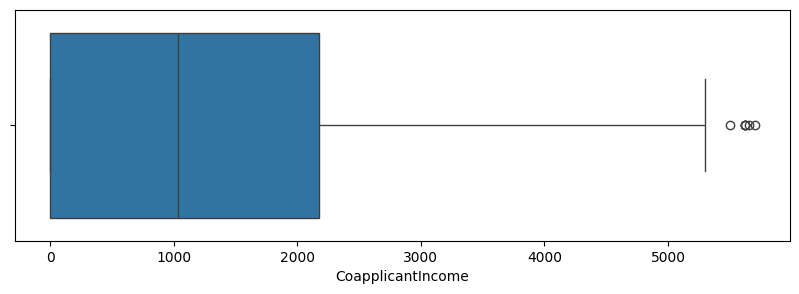

In [62]:
plt.figure(figsize=(10,3))
sns.boxplot(x='CoapplicantIncome' , data=new_dataset2)
plt.show()

C:\Users\Aahil Khan\AppData\Local\Temp\ipykernel_46284\1441929397.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_dataset2['CoapplicantIncome'])


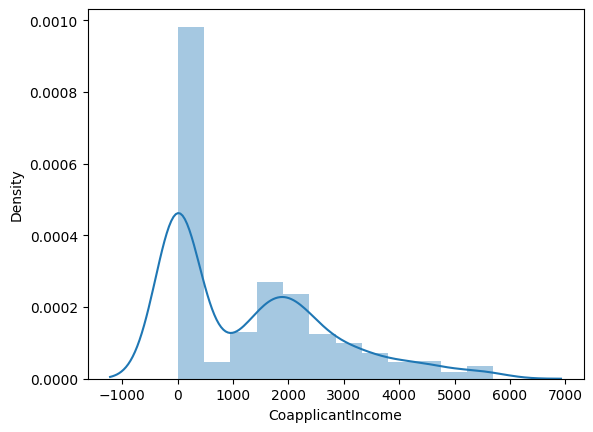

In [63]:
sns.distplot(new_dataset2['CoapplicantIncome'])
plt.show()

In [66]:
### now using z-score
z_score = (dataset["CoapplicantIncome"] - dataset["CoapplicantIncome"].mean())/dataset["CoapplicantIncome"].std()
z_score

0     -0.554036
1     -0.038700
2     -0.554036
3      0.251774
4     -0.554036
         ...   
609   -0.554036
610   -0.554036
611   -0.472019
612   -0.554036
613   -0.554036
Name: CoapplicantIncome, Length: 614, dtype: float64

In [67]:
dataset["zscore_CoapplicantIncome"] = z_score

In [74]:
zscore_dataset = dataset[dataset["zscore_CoapplicantIncome"] <= 3]
# select data less than 3rd score

In [75]:
zscore_dataset.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,zscore_CoapplicantIncome
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,-0.554036


In [77]:
zscore_dataset.shape

(608, 14)

In [79]:
#### Chahy ap z-score use kry ya min max use kry 2no cases me numbers of rows baki kitni bachy
# hyn. us ka answer same he ae ga. means outliers remove 2no me equal ho gy
